# 📊 Minor Project: Customer Churn Prediction
### Using Logistic Regression

**Objective:** Predict whether a customer will stop using a service (churn) based on demographic and service-related data.

**Overview:**
This project uses logistic regression to analyze customer behavior and identify key factors that contribute to churn. It demonstrates a complete machine learning workflow — from data preprocessing to model evaluation.

## 🧩 Problem Statement
Customer retention is critical for businesses. By predicting which customers are likely to leave (churn), companies can take proactive steps to retain them and improve profitability.

**Goal:** Build a machine learning model that accurately classifies customers as *Churned* or *Not Churned*.

## 📂 Dataset Overview
The dataset contains information about customers such as their demographics, account information, and usage details. The target variable indicates whether a customer has churned (1) or not (0).

## ⚙️ Data Preprocessing
Before building the model, the data is cleaned and transformed:
- Handling missing values
- Encoding categorical features
- Splitting data into training and testing sets

## 🤖 Model Building: Logistic Regression
Logistic Regression is used to model the probability that a customer will churn. It is simple, interpretable, and effective for binary classification tasks.

## 📈 Model Evaluation
The model performance is evaluated using:
- Accuracy
- Confusion Matrix
- Classification Report
- ROC Curve and AUC Score

## Step 1: Import Libraries
Import libraries for data handling, visualization, and machine learning.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2: Load Dataset
Read the customer churn dataset using Pandas.

In [2]:
data=pd.read_csv('data.csv')

## Step 3: View Data Sample
Display first few rows to understand data format.

In [3]:
data.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


## Step 4: Statistical Summary
View summary statistics for numerical columns.

In [4]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## Step 5: Data Info
Check data types and non-null counts.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Step 6: Missing Values
Check for null or missing data in each column.

In [6]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Step 7: Churn Distribution
Visualize churn vs. non-churn using a pie chart.

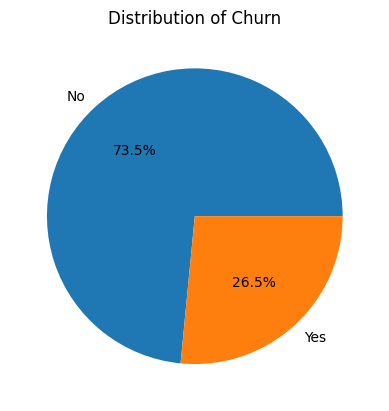

In [7]:
plt.pie(data['Churn'].value_counts(), labels=data['Churn'].value_counts().index, autopct='%1.1f%%')
plt.title('Distribution of Churn')
plt.show()

## Step 8: Gender vs Churn
Visualize churn count based on gender.

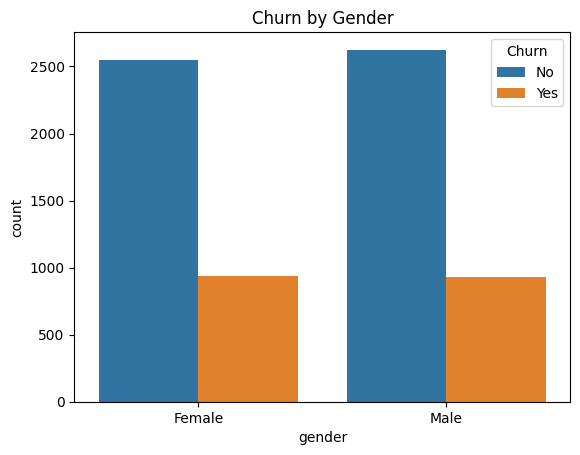

In [8]:
sns.countplot(x='gender', hue='Churn', data=data)
plt.title('Churn by Gender')
plt.show()

## Step 9: Encode Categorical Data
Convert string columns into numeric using LabelEncoder.

In [9]:
from sklearn.preprocessing import LabelEncoder

cat_cols = data.select_dtypes(include=['object']).columns

le = LabelEncoder()
for col in cat_cols:
    data[col] = le.fit_transform(data[col])

## Step 10: Split Features and Target
Separate dataset into independent (X) and dependent (y) variables.

In [10]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

## Step 11: Split Dataset
Divide data into training and testing sets to evaluate model performance.

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)

Training set: (5634, 20)
Testing set: (1409, 20)


## Step 12: Train Logistic Regression Model
Use Logistic Regression for binary classification (Churn or Not Churn).

In [12]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,10000
,multi_class,'deprecated'


## Step 13: Evaluate Model Performance
Check model accuracy and view confusion matrix to assess prediction quality.

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred)*100)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 81.47622427253371

Confusion Matrix:
 [[940  96]
 [165 208]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.68      0.56      0.61       373

    accuracy                           0.81      1409
   macro avg       0.77      0.73      0.75      1409
weighted avg       0.81      0.81      0.81      1409



## Step 14: ROC Curve and AUC Score
Plot the ROC curve to evaluate model’s discrimination ability.

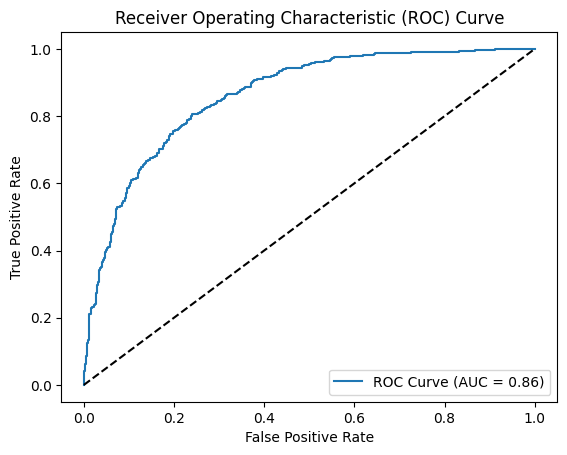

In [14]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## 🧠 Results & Insights
The Logistic Regression model provides insight into which factors influence churn the most. Key performance metrics help assess its effectiveness.

## 🏁 Conclusion & Future Work
**Conclusion:**
This project successfully implemented a logistic regression model for predicting customer churn. The model achieved reasonable accuracy and offers a foundation for further enhancement.

**Future Work:**
- Experiment with ensemble methods (Random Forest, XGBoost)
- Feature selection and hyperparameter tuning
- Deployment of the model as a web application or API